In [2]:
!jt -r

Reset css and font defaults in:
/Users/BO/.jupyter/custom &
/Users/BO/Library/Jupyter/nbextensions


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm.auto import tqdm
# import os
# import yfinance as yf
# from arch import arch_model
# import statsmodels.api as sm
# import time

# import warnings
# warnings.filterwarnings('ignore')

### Парсинг данных

In [19]:
# Get financial data func
def get_financials_data(ticker, freq='A'):
    income_url = f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension={freq}&section=Income%20Statement&sort=desc'
    balance_url = f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension={freq}&section=Balance%20Sheet&sort=desc'
    cash_url = f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension={freq}&section=Cash%20Flow&sort=desc'
    metrics_url = f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension={freq}&section=Metrics&sort=desc'
    growth_url = f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension={freq}&section=Growth&sort=desc'
    
    # Load xlsx files
    income_df = pd.read_excel(income_url)
    balance_df = pd.read_excel(balance_url)
    cash_df = pd.read_excel(cash_url)
    metrics_df = pd.read_excel(metrics_url)
    growth_df = pd.read_excel(growth_url)
    
    # Merge and process all data
    financial_df = pd.concat([income_df, balance_df, cash_df, metrics_df, growth_df], axis=0, ignore_index=True) 
    financial_df = financial_df.rename(columns={'Unnamed: 0': 'Params'}).set_index('Params')
    financial_df = financial_df.T
    financial_df.index = financial_df.index.to_series().apply(lambda x: x.date())
    
    return financial_df



In [20]:
ticker, freq = 'BMY', 'A'
get_financials_data(ticker, freq).head(100)


Params,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expenses,Operating Income,Non-operating Income/Expense,EBT,Income Tax Provision,...,5Y Operating Income Growth (CAGR),3Y Operating Income Growth (CAGR),5Y Net Income Growth (CAGR),3Y Net Income Growth (CAGR),10Y Operating CF Growth (CAGR),5Y Operating CF Growth (CAGR),3Y Operating CF Growth (CAGR),10Y Total Assets Growth (CAGR),5Y Total Assets Growth (CAGR),3Y Total Assets Growth (CAGR)
2019-12-31,2.614500e+10,0.1589,8.078000e+09,1.806700e+10,6.148000e+09,4.871000e+09,4.975000e+09,NaN,4.975000e+09,1.515000e+09,...,0.1588,-0.0561,0.1141,-0.0828,0.0709,0.2071,0.3817,0.1541,0.3095,0.5680
2018-12-31,2.256100e+10,0.0859,6.467000e+09,1.609400e+10,6.332000e+09,4.551000e+09,5.968000e+09,NaN,5.968000e+09,1.021000e+09,...,0.1560,0.4217,0.1393,0.4649,NaN,0.1088,0.4131,NaN,-0.0194,0.0329
2017-12-31,2.077600e+10,0.0694,6.014000e+09,1.476200e+10,6.468000e+09,4.751000e+09,5.131000e+09,NaN,5.131000e+09,4.156000e+09,...,0.0423,0.2917,-0.1246,-0.2050,NaN,-0.0534,0.1878,NaN,-0.0134,-0.0020
2016-12-31,1.942700e+10,0.1731,4.969000e+09,1.445800e+10,5.012000e+09,4.979000e+09,5.915000e+09,NaN,5.915000e+09,1.408000e+09,...,-0.0326,0.2695,0.0379,0.2025,NaN,-0.0877,-0.0481,NaN,0.0044,-0.0441
2015-12-31,1.656000e+10,0.0429,3.909000e+09,1.265100e+10,5.920000e+09,4.841000e+09,2.077000e+09,NaN,2.077000e+09,4.460000e+08,...,-0.1931,-0.2073,-0.1272,-0.0721,NaN,-0.1406,-0.3281,NaN,0.0043,-0.0401
2014-12-31,1.587900e+10,-0.0309,3.932000e+09,1.194700e+10,4.534000e+09,4.822000e+09,2.381000e+09,NaN,2.381000e+09,3.520000e+08,...,-0.1485,-0.3013,-0.2833,-0.1849,NaN,-0.0498,-0.1336,NaN,0.0171,0.0078
2013-12-31,1.638500e+10,-0.0701,4.619000e+09,1.176600e+10,3.731000e+09,4.939000e+09,2.891000e+09,NaN,2.891000e+09,3.110000e+08,...,NaN,-0.2191,NaN,-0.0604,NaN,NaN,-0.0758,NaN,NaN,0.0749
2012-12-31,1.762100e+10,-0.1705,4.610000e+09,1.301100e+10,3.904000e+09,5.017000e+09,4.170000e+09,-1.830000e+09,2.340000e+09,-1.610000e+08,...,NaN,-0.0780,NaN,-0.4303,NaN,NaN,0.1952,NaN,NaN,0.0500
2011-12-31,2.124400e+10,0.0903,5.598000e+09,1.564600e+10,3.839000e+09,5.160000e+09,6.981000e+09,NaN,6.981000e+09,1.721000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def calc_dsi(divs, window):
    y_max = 0
    g_max = 0
    curr_y = 0
    curr_g = 0
    for index, value in enumerate(divs):
        if index == 0:
            continue
        if value != 0:
            curr_y += 1
            y_max = max(curr_y, y_max)
        else:
            curr_y = 0
        if value > divs[index -1]:
            curr_g += 1
            g_max = max(g_max, curr_g)
        else:
            curr_g += 1
            
    return (y_max + g_max) / ((window) * 2) * 10

In [4]:
def calc_features(df, size=7):
    df['financial_health'] = df['Net Debt'] / df['EBITDA']
    df['value'] = df['Free Cash Flow'] / df['Market Cap']
    df['payout_ratio'] = - df['Dividends Paid (Common)'] / df['Free Cash Flow']
    df[f'dsi_{size}'] = df['Dividends'].rolling(window=size + 1).apply(lambda x: calc_dsi(x, size))
    return df

In [5]:
def parse_divs(ticker):
    url = f'https://finance.yahoo.com/quote/{ticker}/history?period1=438220800&period2=1604793600&interval=div%7Csplit&filter=div&frequency=1d&includeAdjustedClose=true'
    div_df = pd.read_html(url)
    div_df = div_df[0][['Date', 'Dividends']].iloc[:-1]
    div_df.columns = ['Date', 'Dividends']
    div_df['Dividends'] = div_df['Dividends'].apply(lambda x: float(x.replace(' Dividend', '')))
    div_df['Date'] = pd.to_datetime(div_df['Date'])
    div_df = div_df.sort_values(by='Date')
    return div_df

In [6]:
def parse_data(ticker, criteria_cols):
    
    print('Reading financial data...', end=' ')
    financial_cols = ['Net Debt', 'EBITDA', 'Free Cash Flow', 'Market Cap', 'Dividends Paid (Common)']
    
    financial_df = get_financials_data(ticker) # Get financial data from stockrow
    financial_df = financial_df[financial_cols] 
    financial_df['year'] = financial_df.index.to_series().apply(lambda x: x.year).astype(int)
    financial_df = financial_df.sort_values(by='year')
    financial_df = financial_df.set_index('year')
    print('Ok')
    
    # price & div info
    print('Reading price data...', end=' ')
    prices = yf.download(ticker,'1950-01-01', '2020-12-31')
    div_df = parse_divs(ticker)
    div_df = div_df.set_index('Date')
    prices = prices.merge(div_df, how='left', left_index=True, right_index=True)
    div_dates = prices[~prices['Dividends'].isna()]
    div_dates['year'] = div_dates.index.to_series().apply(lambda x: x.year)
    div_dates = div_dates[div_dates['year'] >= 1998]
    div_dates = div_dates.reset_index().groupby(by='year', as_index=False).agg({'Adj Close': 'last', 'Close': 'last', 
                                                                  'Dividends': 'sum', 'Date': 'last'})
    div_dates['yield'] = div_dates['Dividends'] / div_dates['Adj Close']
    print('Ok')
    # merge data

    print('Calc features...', end=' ')
    div_dates = div_dates.merge(financial_df, on='year', how='left')
    div_dates = calc_features(div_dates)
    div_dates = div_dates[criteria_cols]
    div_dates = div_dates.set_index('year')
    div_dates.columns = [f'{ticker}_{i}' for i in div_dates.columns]
    print('Ok')
    return div_dates

In [7]:
info_url = 'https://datahub.io/core/s-and-p-500-companies/r/0.html'
criteria_cols = ['financial_health', 'payout_ratio', 'value', 'dsi_7', 'yield', 'Market Cap', 'year', 'EBITDA']

In [22]:
# tickers_info = pd.read_csv('data/constituents_csv.csv')

In [9]:
all_tickers = tickers_info['Symbol'].values
len(all_tickers)

505

In [10]:
all_tickers[:5]

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD'], dtype=object)

In [11]:
all_tickers = ['BMY', 'MED', 'ET', 'BTI', 'ABBV', 'T', 'DFS', 'JNJ', 'BEP', 'PEAK', 'DUK', 'NTES', 'INTC', 'MCD', 'NVS',]

In [13]:
total_df = []
bad_tickers = []
for ticker in tqdm(all_tickers[:10]):
    try:
        print(ticker)
        curr_df = parse_data(ticker, criteria_cols)
        total_df.append(curr_df)
        time.sleep(5)

    except Exception as e:
        bad_tickers.append(ticker)
        print(repr(e))
        continue

BMY
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
MED
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
ET
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
BTI
Reading financial data... KeyError("['Market Cap'] not in index",)
ABBV
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
T
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
DFS
Reading financial data... KeyError("['EBITDA'] not in index",)
JNJ
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc features... Ok
BEP
Reading financial data... Ok
[*********************100%***********************]  1 of 1 completed
Ok
Calc feat

In [14]:
len(total_df)

13

In [15]:
len(bad_tickers)

2

In [49]:
df = None
for d in tqdm(total_df):
    if df is None:
        df = d
        continue
    df = df.merge(d, left_index=True, right_index=True, how='outer')

In [50]:
criteria_cols

['financial_health',
 'payout_ratio',
 'value',
 'dsi_7',
 'yield',
 'Market Cap',
 'year',
 'EBITDA']

In [51]:
selected_tickers = list(sorted(set([i.split('_')[0] for i in df.columns])))

In [52]:
for col in criteria_cols:
    curr_df = df.loc[:, df.columns.str.contains(col)]
    break

In [53]:
curr_df

,MMM_financial_health,AOS_financial_health,ABT_financial_health,ABBV_financial_health,ACN_financial_health,ATVI_financial_health,ADBE_financial_health,AAP_financial_health,AES_financial_health,AFL_financial_health,...,WELL_financial_health,WST_financial_health,WDC_financial_health,WU_financial_health,WRK_financial_health,WHR_financial_health,WMB_financial_health,WLTW_financial_health,WYNN_financial_health,XEL_financial_health
year,,,,,,,,,,,,,,,,,,,,,
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.concat(total_df, axis=0, join='outer', )

In [50]:
total_df[-2]

,CNP_financial_health,CNP_payout_ratio,CNP_value,CNP_dsi_7,CNP_yield,CNP_Market Cap
year,,,,,,
1998,NaN,NaN,NaN,NaN,0.194248,NaN
1999,NaN,NaN,NaN,NaN,0.172534,NaN
2000,NaN,NaN,NaN,NaN,0.110399,NaN
2001,NaN,NaN,NaN,NaN,0.153287,NaN
2002,NaN,NaN,NaN,NaN,0.613415,NaN
2003,NaN,NaN,NaN,NaN,0.188600,NaN
2004,NaN,NaN,NaN,NaN,0.071882,NaN
2005,NaN,NaN,NaN,7.857143,0.059697,NaN
2006,NaN,NaN,NaN,10.000000,0.068196,NaN


### Анализ одной компании

In [258]:
criteria_cols = ['financial_health', 'payout_ratio', 'value', 'dsi_7', 'yield']

In [125]:
ticker = 'T'
div_url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=438220800&period2=1605052800&interval=1d&events=div&includeAdjustedClose=true'

In [193]:
financial_df = get_financials_data(ticker)

In [203]:
financial_df = financial_df[financial_cols]

financial_df['year'] = financial_df.index.to_series().apply(lambda x: x.year)

financial_df = financial_df.sort_values(by='year')
financial_df = financial_df.set_index('year')

In [204]:
prices = yf.download(ticker,'1950-01-01','2020-12-31')
prices.shape

[*********************100%***********************]  1 of 1 completed


(9322, 6)

In [77]:
ticker = 'T'

In [78]:
div_url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=438220800&period2=1605052800&interval=1d&events=div&includeAdjustedClose=true'

In [79]:
div_df = pd.read_csv(div_url)
div_df['Date'] = pd.to_datetime(div_df['Date'])

In [80]:
div_df.head()

,Date,Dividends
0,1996-10-08,0.4300
1,2013-07-08,0.4500
2,2017-07-06,0.4900
3,2005-04-06,0.3225
4,2009-01-07,0.4100


In [206]:
div_df = div_df.sort_values(by='Date')
div_df = div_df.set_index('Date')

In [207]:
prices = prices.merge(div_df, how='left', left_index=True, right_index=True)

In [208]:
prices['is_div'] = prices['Dividends'].apply(lambda x: 1 if x != np.nan else 0)

In [209]:
div_dates = prices[~prices['Dividends'].isna()]

In [211]:
div_dates['year'] = div_dates.index.to_series().apply(lambda x: x.year)

In [213]:
div_dates = div_dates[div_dates['year'] >= 1998]
div_dates = div_dates.reset_index().groupby(by='year', as_index=False).agg({'Adj Close': 'last', 'Close': 'last', 
                                                              'Dividends': 'sum', 'Date': 'last'})

In [215]:
div_dates['yield'] = div_dates['Dividends'] / div_dates['Adj Close']
# div_dates['yield'] = div_dates['Dividends'] / div_dates['Close']

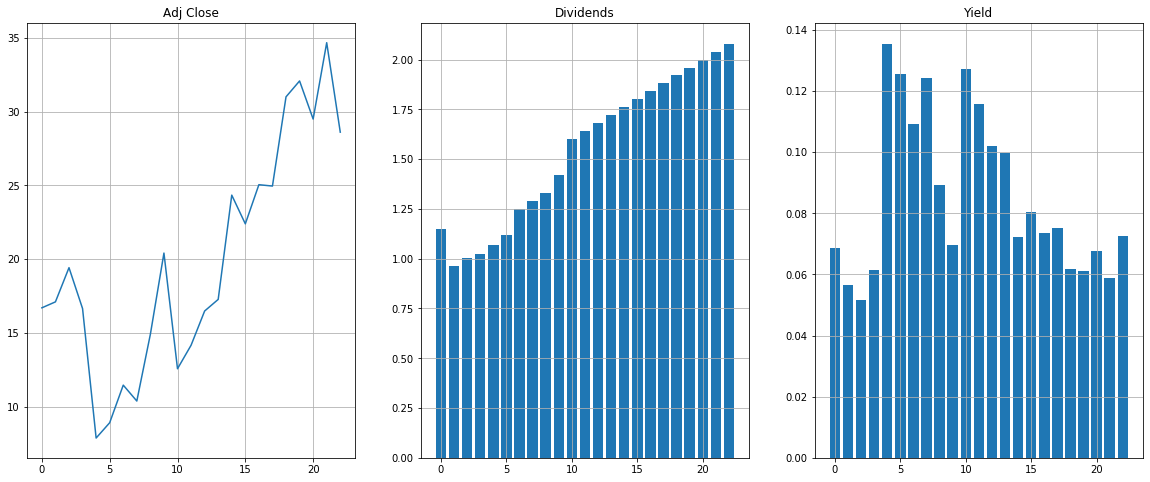

In [216]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.plot(div_dates['Adj Close'])
plt.title('Adj Close')
plt.grid()

plt.subplot(1, 3, 2)
plt.bar(div_dates.index, div_dates['Dividends'])
plt.title('Dividends')
plt.grid()

plt.subplot(1, 3, 3)
plt.bar(div_dates.index, div_dates['yield'])
plt.title('Yield')
plt.grid()

plt.show()

In [219]:
div_dates = div_dates.merge(financial_df, on='year', how='left')

In [ ]:
# 1. net debt / ebitda.rolling(window=4).sum()
# 2. оценка стоимости с ранжированием = свободный ден поток/капитализация - ранжирование на 10 равных частей
# 3.
# -Dividends Paid (Total)/Free cash flow
# https://stockrow.com/T/financials/cashflow/quarterly
# ранжирование на 10 равных частей
# 4. стабильность дивидендов
# DSI*10 с округлением
5. див доходность с ранжированием

In [253]:
div_dates['financial_health'] = div_dates['Net Debt'] / div_dates['EBITDA']
div_dates['value'] = div_dates['Free Cash Flow'] / div_dates['Market Cap']
div_dates['payout_ratio'] = - div_dates['Dividends Paid (Total)'] / div_dates['Free Cash Flow']

In [255]:
size = 7
div_dates[f'dsi_{size}'] = div_dates['Dividends'].rolling(window=size + 1).apply(lambda x: calc_dsi(x, size))

In [272]:
criteria_cols = ['financial_health', 'payout_ratio', 'value', 'dsi_7', 'yield', 'year']

In [273]:
div_dates[criteria_cols]

,financial_health,payout_ratio,value,dsi_7,yield,year
0,NaN,NaN,NaN,NaN,0.068797,1998
1,NaN,NaN,NaN,NaN,0.056437,1999
2,NaN,NaN,NaN,NaN,0.051752,2000
3,NaN,NaN,NaN,NaN,0.061434,2001
4,NaN,NaN,NaN,NaN,0.135515,2002
5,NaN,NaN,NaN,NaN,0.125464,2003
6,NaN,NaN,NaN,NaN,0.109114,2004
7,NaN,NaN,NaN,10.0,0.124307,2005
8,NaN,NaN,NaN,10.0,0.089219,2006
9,NaN,NaN,NaN,10.0,0.069569,2007
